<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a>&nbsp;| [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en) | <a href="https://supaerodatascience.github.io/machine-learning/">https://supaerodatascience.github.io/machine-learning/</a>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Decision Trees</div>


1. [The Iris dataset](#sec1)
2. [What is a decision tree?](#sec2)
3. [Growing decision trees](#sec3)
4. [A note on the Entropy and the Gini index](#sec4)
5. [Generalizing the splitting criterion](#sec5)
6. [Practicing with trees](#sec6)
7. [Variability of decision trees](#sec7)
8. [Conclusion on Decision Trees](#sec8)
9. [Examples](#sec9)
    1. [Spam or ham?](#sec9-1)
    2. [NIST](#sec9-2)

# <a id="sec1"></a>1. The Iris dataset
- 150 Iris flowers
- 3 species (labels)
- 4 morphologic features: petal and sepal width and length
- 50 examples in each class

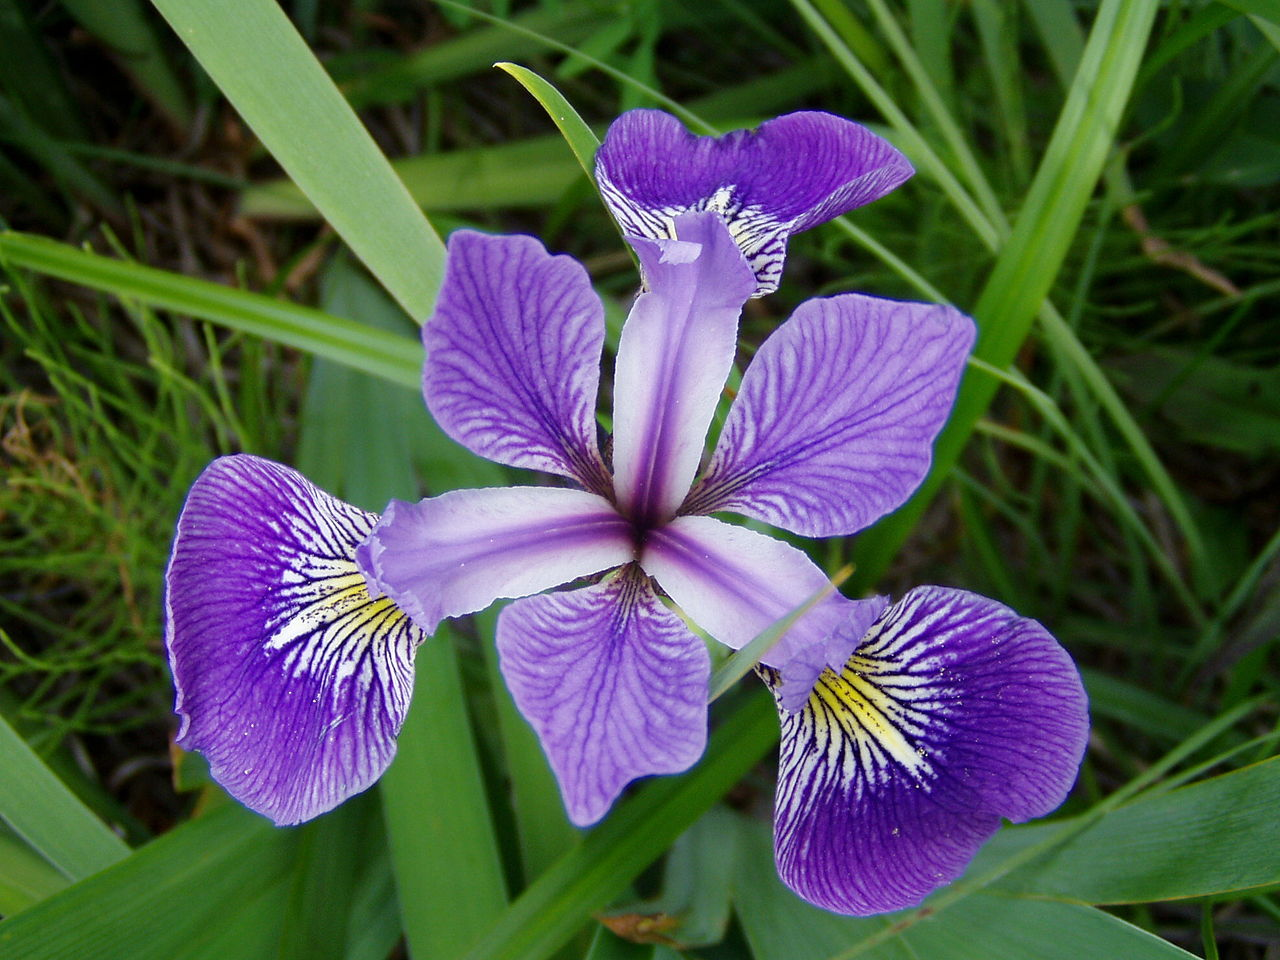

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)
print("\n",iris.DESCR)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.7

# <a id="sec2"></a> 2. What is a decision tree?

**Hierarchical description of data based on logical (binary) questions**.

Ingredients:
- Nodes<br>
Each node contains a **test** on the features which **partitions** the data.
- Edges<br>
The outcome of a node's test leads to one of its child edges.
- Leaves<br>
A terminal node, or leaf, holds a **decision value** for the output variable.
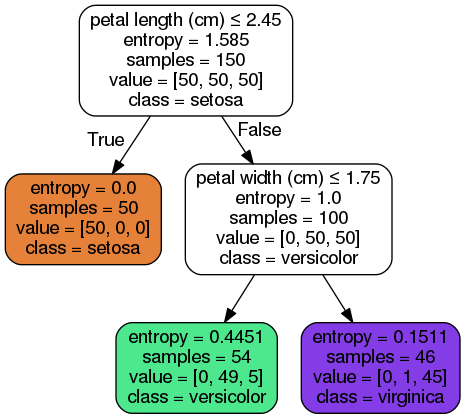

# <a id="sec3"></a>3. Growing decision trees

Training Set $T$, attributes $x_1,\ldots, x_p$

<div class= "alert alert-success">
    
**FormTree($T$)**<br>
<ol>
<li> Find best split $(j, s)$ over $T$ // Which criterion?
<li> If $(j, s) = \emptyset$, 
    <ul>
    <li>  node = FormLeaf(T) // Which value for the leaf?
    </ul>
<li> Else
    <ul>
    <li> node = $(j, s)$
    <li> split $T$ according to $(j, s)$ into $(T1, T2)$
    <li> append FormTree($T1$) to node // Recursive call
    <li> append FormTree($T2$) to node
    </ul>
<li> Return node
</ol>
</div>

**Classification: splitting criterion**

Choose split $(j,s)$ that maximizes the entropy (information) gain:
$$N_1 \sum\limits_{k=1}^K \hat{p}_{1k} \log \hat{p}_{1k} + N_2 \sum\limits_{k=1}^K \hat{p}_{2k} \log \hat{p}_{2k}$$
with $N_m$: number of examples in node $m$ and $p_{mk}$: proportion of class $k$ in node $m$

Alternate criterion: maximize the Gini index gain.
$$N_1 \sum\limits_{k=1}^K \hat{p}_{1k} \left(1-\hat{p}_{1k}\right) + N_2 \sum\limits_{k=1}^K \hat{p}_{2k} \left( 1- \hat{p}_{2k} \right)$$

**Classification: value of a leaf node**
- majority class.

**Regression: splitting criterion**

We want to minimize the **sum of squares** error in a leaf node:
$$\sum_{i=1}^{N_m} \left(y_i - \hat{f}(x_i)\right)^2$$
Where $\hat{f}(x_i)$ is the prediction in $x_i$. For simplicity, we take constant node-wise predictions $\hat{f}(x_i)= \hat{y}_i$. We introduce the node impurity measure as the mean square error:
$$Q_m = \frac{1}{N_m} \sum_{i=1}^{N_m} \left(y_i - \hat{y}_i\right)^2 $$
The best split is then the one that minimizes
$$N_1 Q_1 + N_2 Q_2$$

**Regression: value of a leaf node**
- average

Alternatives (but imply to change the splitting criterion):
- median
- extreme values
- B-spline

# <a id="sec4"></a> 4. A note on the Entropy and the Gini index

Suppose a set of samples $T=\left\{(x,y)\right\}$ where $y\in \{0;1\}$ and a constant value for $x$. The labels $y$ give some class information on $x$. One relevant question is "how much useful information is there in $T$?".

- For example, if half of the examples have label "0" and the other half has label "1", then there is no real useful information in $T$.
- On the other hand, if all the examples have the same label, then $T$ is very informative regarding the real class of $x$.

Intuitively, a measure of "disorder" in a training set is an opposite measure of "information". That's what Shannon theorized in his Information theory.

A measure of disorder is the (binary) entropy of a set of bits. Suppose $p$ is the probability of class "0":
$$H(p) = -p \log_2(p) - (1-p)\log_2(1-p)$$

<img src="attachment:binary_entropy.png" width="400px">

When building a tree, we want to choose each split so that it increases the overall information. Hence we want to decrease the overall entropy. Since entropy is additive, if the subscript "0" refers of a node and the subscripts "1" and "2" to its children after a split, we want $N_0 H_0 > N_1 H_1 + N_2 H_2$.

The Gini index expresses somehow the same idea. It was introduced by Gini (a sociologist and statistician) in 1936 to describe inequalities of income or wealth within a population. For $K$ classes, it is written:
$$\sum_{k=1}^K p_k(1-p_k)$$

To get an intuition of why this is a measure of inequality, suppose a training set $T=\left\{(x,y)\right\}$ with only two classes $\{0;1\}$. Suppose you pick an individuals $x$ at random in $T$ and then you pick a class $y$ at random in $T$ again. What is the probability that $y$ is not the label of $x$?
$$p(1-p) + (1-p)(1-(1-p))$$

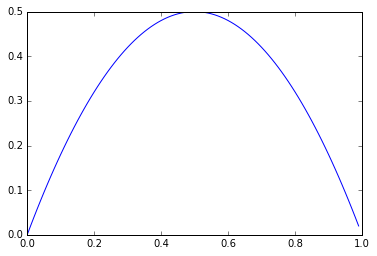

# <a id="sec5"></a> 5. Generalizing the splitting criterion

Overall it is a matter of decreasing an impurity measure in the current node. This impurity measure is the **fitness** criterion our tree tries to (locally) minimize: entropy, Gini index, mean square error.

# <a id="sec6"></a> 6. Practicing with trees

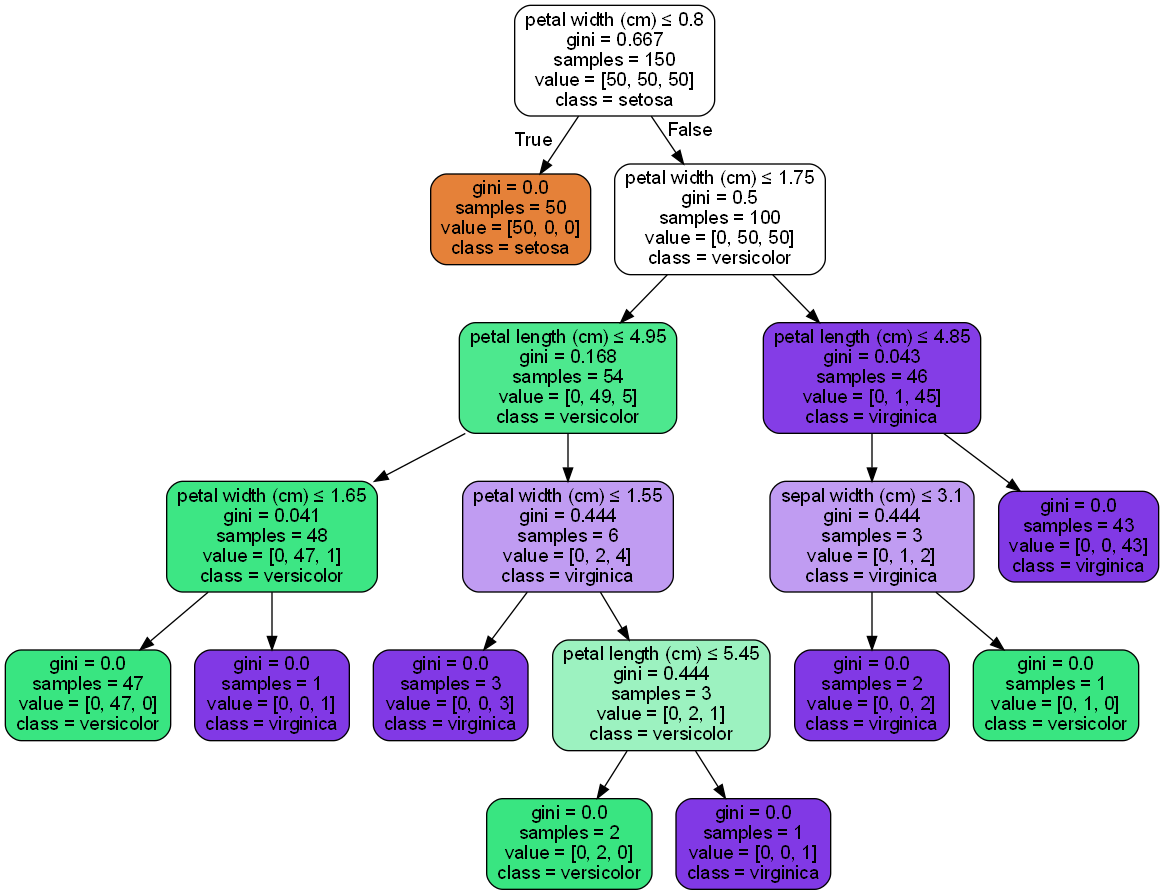

In [2]:
from sklearn import tree
from os import system
from IPython.display import Image

iris_dt = tree.DecisionTreeClassifier()
iris_dt.fit(iris.data, iris.target)

def disp_iris_tree(filename, treename):
    dotfile = open(filename+'.dot', 'w')
    tree.export_graphviz(treename, 
                         out_file = dotfile, 
                         feature_names = iris.feature_names,
                         class_names=iris.target_names,  
                         filled=True,
                         rounded=True,  
                         special_characters=True)
    dotfile.close()
    system("dot -Tpng "+filename+".dot -o "+filename+".png")
    #system("dot -Tpng "+filename+".dot -o "+filename+".png")
    return Image(filename+'.png')

disp_iris_tree('iris_dt',iris_dt)

Let's try to limit the depth of the tree to preserve the generalization error.

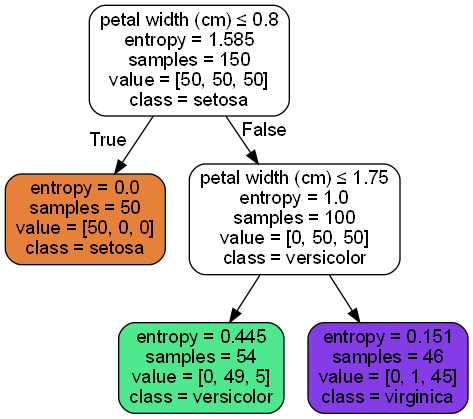

In [3]:
iris_dt2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
iris_dt2.fit(iris.data, iris.target)
disp_iris_tree('iris_dt2',iris_dt2)

Let's try on 2D complex data.

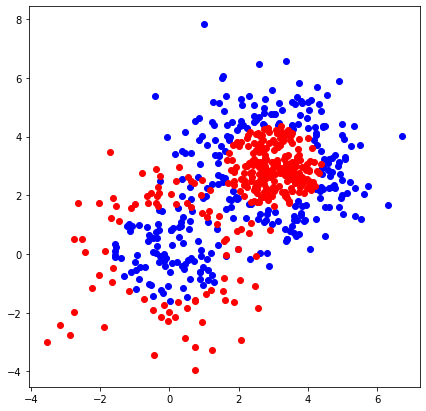

In [4]:
import numpy as np
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt

def gen_data(seed):
    X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=seed)
    X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=700, n_features=2,
                                 n_classes=2, random_state=seed)
    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, - y2 + 1))
    y = 2*y-1
    X, y = shuffle(X, y)
    return X, y

X,y = gen_data(1)
Xtest,X = np.split(X,[400])
ytest,y = np.split(y,[400])

Xblue = X[y==-1]
Xred = X[y==1]
plt.figure(figsize=(7,7))
plt.scatter(Xblue[:,0],Xblue[:,1],c='b')
_=plt.scatter(Xred[:,0],Xred[:,1],c='r')

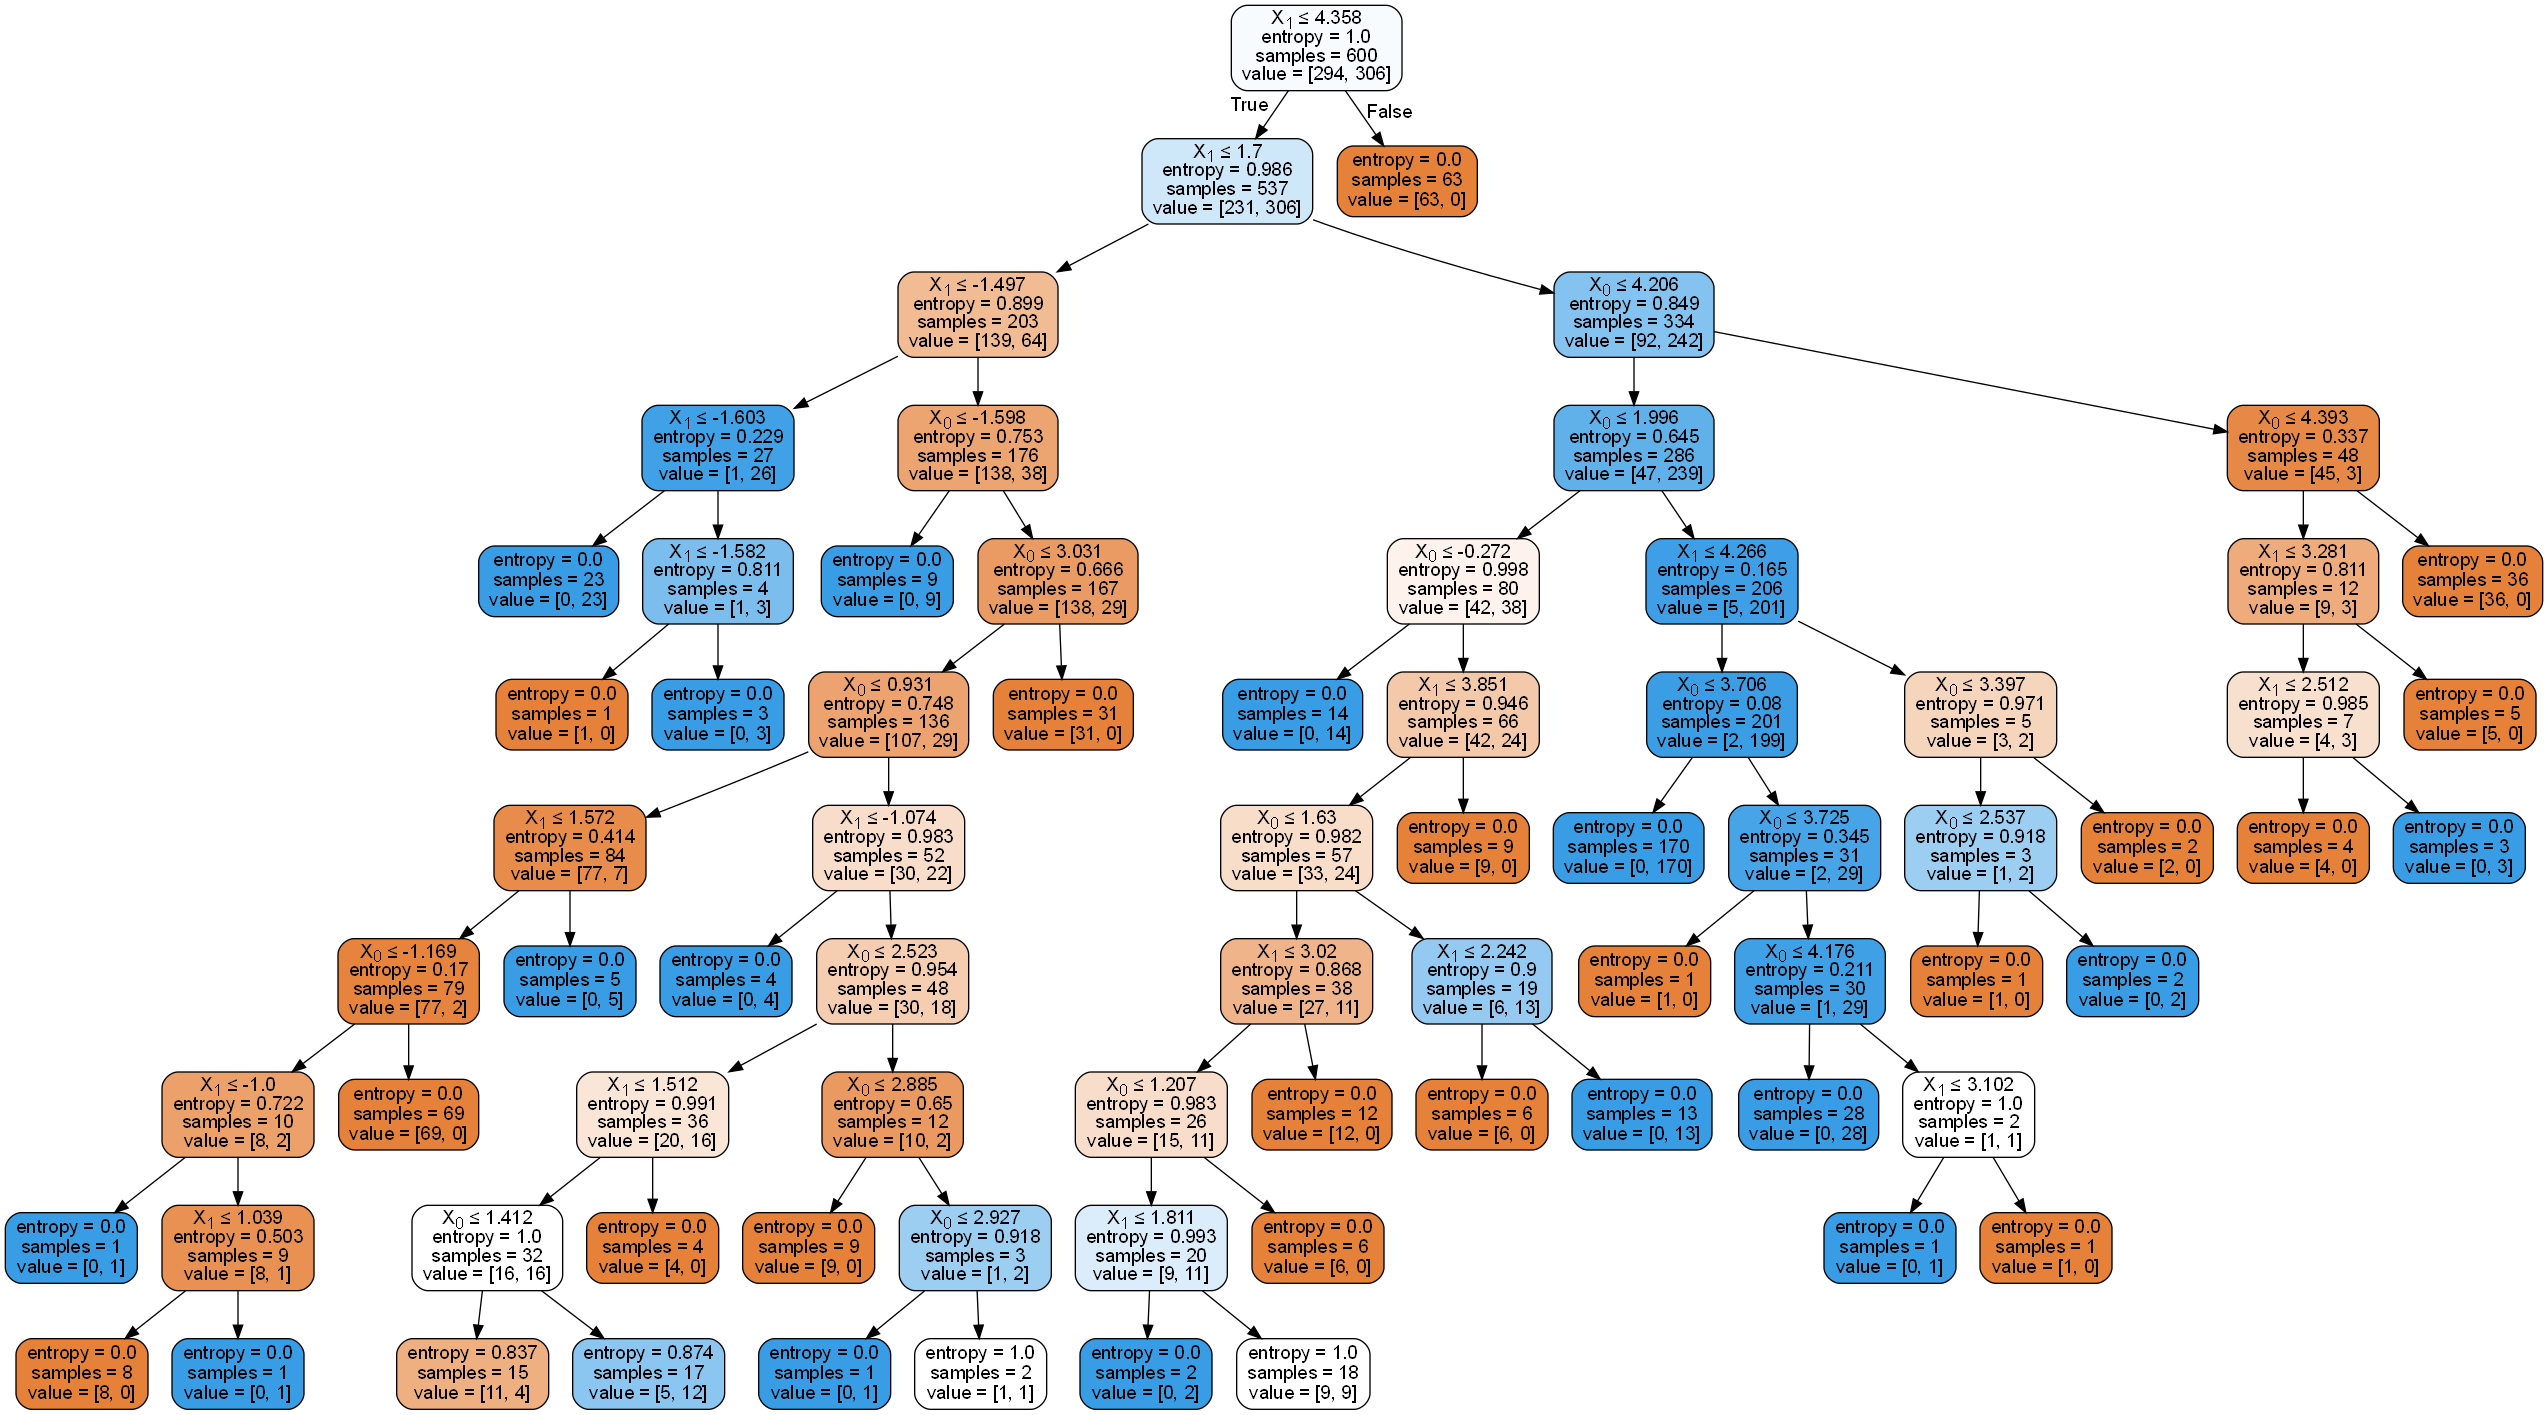

In [5]:
# Change max_depth parameter to 10
dt1 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt1.fit(X,y)

def disp_tree(filename, treename):
    dotfile = open(filename+'.dot', 'w')
    tree.export_graphviz(treename, 
                         out_file = dotfile,
                         filled=True,
                         rounded=True,  
                         special_characters=True)
    dotfile.close()
    system("dot -Tpng "+filename+".dot -o "+filename+".png")
    return Image(filename+'.png')

disp_tree('dt1',dt1)

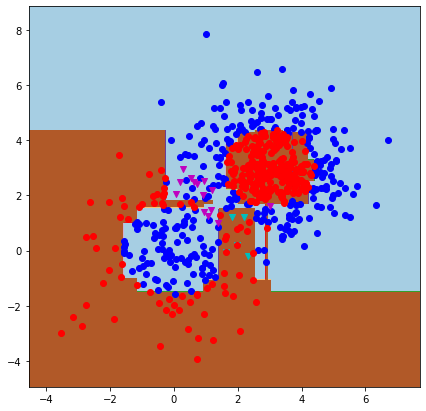

Training error: 0.0316667
Generalization error: 0.0975


In [6]:
def plot_decision_boundary_tree(t, X, y, fig_size=(7,7)):
    plot_step = 0.02
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, plot_step), np.arange(x1_min, x1_max, plot_step))
    yypred = t.predict(np.c_[xx0.ravel(),xx1.ravel()])
    yypred = yypred.reshape(xx0.shape)
    plt.figure(figsize=fig_size)
    plt.contourf(xx0, xx1, yypred, cmap=plt.cm.Paired)
    y_pred = t.predict(X)
    Xblue_good = X[np.equal(y,-1)*np.equal(y,y_pred)]
    Xblue_bad  = X[np.equal(y,-1)*np.not_equal(y,y_pred)]
    Xred_good  = X[np.equal(y,1)*np.equal(y,y_pred)]
    Xred_bad   = X[np.equal(y,1)*np.not_equal(y,y_pred)]
    plt.scatter(Xblue_good[:,0],Xblue_good[:,1],c='b')
    plt.scatter(Xblue_bad[:,0],Xblue_bad[:,1],c='c',marker='v')
    plt.scatter(Xred_good[:,0],Xred_good[:,1],c='r')
    plt.scatter(Xred_bad[:,0],Xred_bad[:,1],c='m',marker='v')
    plt.show()

plot_decision_boundary_tree(dt1, X, y)
print("Training error: %g"%(1-dt1.score(X,y)))
print("Generalization error: %g"%(1-dt1.score(Xtest,ytest)))

# <a id="sec7"></a> 7. Variability of decision trees
Let's generate different data sets from the same distribution and compare how different the classification trees are.

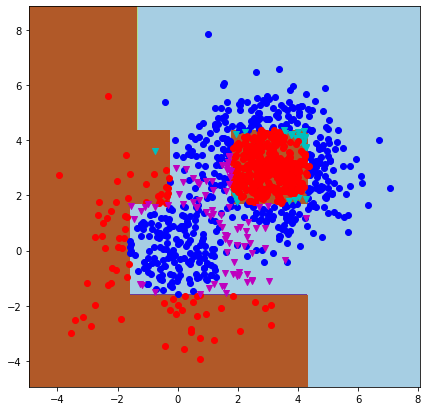

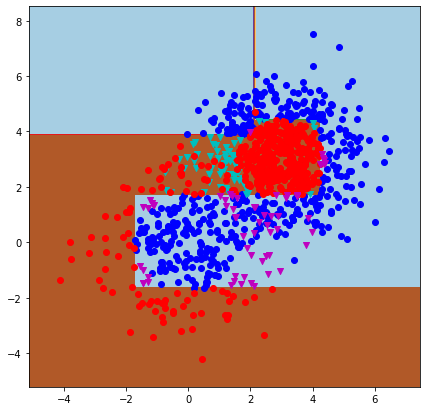

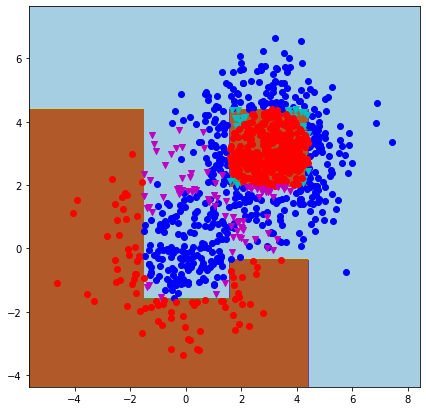

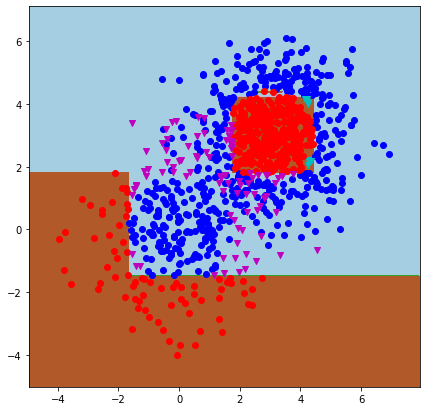

In [7]:
fig_size = (7,7)

# example 1
X,y = gen_data(1)
dt1 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1.fit(X,y)
plot_decision_boundary_tree(dt1, X, y, fig_size)

# example 2
X,y = gen_data(3)
dt1 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1.fit(X,y)
plot_decision_boundary_tree(dt1, X, y, fig_size)

# example 3
X,y = gen_data(5)
dt1 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1.fit(X,y)
plot_decision_boundary_tree(dt1, X, y, fig_size)

# example 4
X,y = gen_data(9)
dt1 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1.fit(X,y)
plot_decision_boundary_tree(dt1, X, y, fig_size)

# <a id="sec8"></a> 8. Conclusion on Decision Trees

## Summary:

Advantages of decision trees:
- Simple to read and to interpret, easy to visualize.
- Learning the tree has complexity linear in the number of data points.
- Forward pass has complexity logarithmic in the number of data points used for training.

Drawbacks of decision trees:
- Very limited representation power (piecewise constant model).
- Very sensitive to overfitting, bad generalization.
- **Very dependent on the input data.**
- No margin or performance guarantees.
   
- Often used with ensemble methods (Boosting, Bagging).

## Further:
- How to prune decision trees?
- How to handle missing values?
- What about preprocessing data?
- What comparison can we make between PCA and trees?

# <a id="sec9"></a> 9. Examples

## <a id="sec9-1"></a>9.1 Spam or ham?

In [8]:
from sys import path
path.append('../2 - Text data preprocessing')
import load_spam
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
spam_data = load_spam.spam_data_loader()
spam_data.load_data()

Xtrain, ytrain, Xtest, ytest = spam_data.split(2000)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# %load solutions/code1.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

spam_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10)
spam_dt.fit(Xtrain,ytrain)

print("score:", spam_dt.score(Xtest,ytest))
disp_tree('spam_dt',spam_dt)

# Compute cross-validation score
nb_trials = 30
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = spam_data.shuffle_and_split(2000)
    spam_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10)
    spam_dt.fit(Xtrain,ytrain)
    score += [spam_dt.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))


In [11]:
spam_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10)
spam_dt.fit(Xtrain,ytrain)

print("score:", spam_dt.score(Xtest,ytest))
disp_tree('spam_dt',spam_dt)

# Compute cross-validation score
nb_trials = 30
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = spam_data.shuffle_and_split(2000)
    spam_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10)
    spam_dt.fit(Xtrain,ytrain)
    score += [spam_dt.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))

score: 0.9529675251959686
****************************** done!
Average generalization score: 0.9530048525569244
Standard deviation: 0.00657099395088133


Let's look for the best values for `max_depth` and `min_samples_leaf`.

In [2]:
depths = np.arange(10,31,2)
leaf_size = np.arange(3,16,2)
nb_trials = 10
scores = np.zeros((depths.shape[0],leaf_size.shape[0]))

In [ ]:
for di in range(depths.shape[0]):
    for szi in range(leaf_size.shape[0]):
        score = []
        for i in range(nb_trials):
            Xtrain, ytrain, Xtest, ytest = spam_data.shuffle_and_split(2000)
            spam_dt = tree.DecisionTreeClassifier(criterion='entropy',
                                                  max_depth=depths[di],
                                                  min_samples_leaf=leaf_size[szi])
            spam_dt.fit(Xtrain,ytrain)
            score += [spam_dt.score(Xtest,ytest)]
        print('*', end='')
        scores[di,szi] = np.mean(score)

****************

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

X, Y = np.meshgrid(leaf_size,depths)

%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, scores, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ind = np.unravel_index(np.argmax(scores, axis=None), scores.shape)
print("maximum score of", scores[ind], "obtained at max_depth =", depths[ind[0]], "and min_samples_leaf =", leaf_size[ind[1]])

NameError: name 'plt' is not defined

Let's evaluate the training on raw word counts, rather than Tf-Idf features.

In [ ]:
Xtrain, ytrain, Xtest, ytest = spam_data.split(2000, feat='wordcount')
# Compute cross-validation score
nb_trials = 30
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = spam_data.shuffle_and_split(2000)
    spam_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10)
    spam_dt.fit(Xtrain,ytrain)
    score += [spam_dt.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))

## <a id="sec9-2"></a> 9.2. NIST

In [ ]:
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt

digits = datasets.load_digits()
#print(digits.data.shape)
#print(digits.images.shape)
#print(digits.target.shape)
#print(digits.target_names)

X = digits.data
y = digits.target
Xtrain,Xtest = np.split(X,[1000])
ytrain,ytest = np.split(y,[1000])

#print(digits.DESCR)

In [ ]:
from sklearn.utils import shuffle

def shuffle_and_split(X,y,n):
    X0,y0 = shuffle(X,y)
    Xtrain,Xtest = np.split(X0,[n])
    ytrain,ytest = np.split(y0,[n])
    return Xtrain, ytrain, Xtest, ytest

In [ ]:
print(Xtrain.shape)
print(ytrain.shape)
digits_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10)
digits_dt.fit(Xtrain,ytrain)
prediction = digits_dt.predict(Xtest)
#print("Training error:", np.sum(np.not_equal(prediction,ytest))/len(ytest))
print("Generalization error:", np.sum(np.not_equal(prediction,ytest))/len(ytest) )
print("Generalization score:", digits_dt.score(Xtest,ytest))